<a href="https://colab.research.google.com/github/ihromovyi/EBD28_PB/blob/main/assignment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Money earned:674.19
Money spent: 825.36
Profit: -151.18
We have a loss because our last transaction was "Buy" on the sum of 165.13. So our final profit is 13.95


Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Rolling Average 20,Rolling Average 50,B or S yesterday,B or S today,B or S
,,,,,,,,,,,,
2023-03-24 00:00:00-04:00,105.115172,105.532696,104.121081,105.433281,25236200,0.0,0.0,96.0,96.0,Buy,Sell,Buy
2023-07-21 00:00:00-04:00,120.155771,120.583231,118.366405,119.599075,56498100,0.0,0.0,120.0,121.0,Sell,Buy,Sell
2023-07-27 00:00:00-04:00,131.021188,132.810555,128.416660,129.102585,35931600,0.0,0.0,122.0,122.0,Buy,Sell,Buy
2023-07-28 00:00:00-04:00,130.196091,133.277779,130.146383,132.224030,26971000,0.0,0.0,122.0,123.0,Sell,Buy,Sell
2023-07-31 00:00:00-04:00,132.224041,133.039203,131.349251,132.323456,18381900,0.0,0.0,123.0,123.0,Buy,Sell,Buy
2023-11-03 00:00:00-04:00,128.327205,129.957513,128.247676,129.599640,19517900,0.0,0.0,133.0,134.0,Sell,Buy,Sell
2023-11-28 00:00:00-05:00,136.816748,137.840660,136.230222,137.800888,17046900,0.0,0.0,134.0,134.0,Buy,Sell,Buy
2024-03-05 00:00:00-05:00,131.955639,133.228074,130.772668,132.989487,28447600,0.0,0.0,142.0,143.0,Sell,Buy,Sell
2024-04-01 00:00:00-04:00,150.932838,156.072287,150.753894,155.575241,24469800,0.0,0.0,144.0,144.0,Buy,Sell,Buy


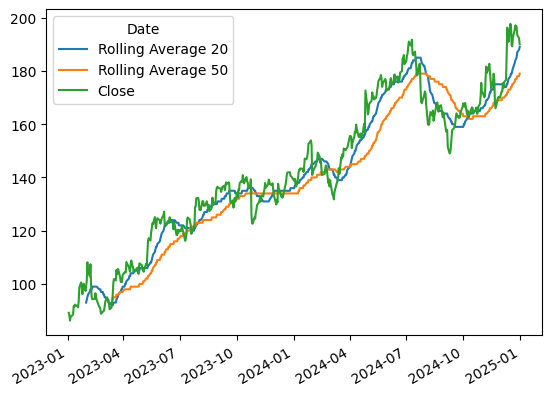

In [120]:
import yfinance as yf
import pandas as pd

#getting our needed data
google = yf.Ticker('GOOG')
google_history = google.history(start="2023-01-01", end="2025-01-01", interval="1d")
df = pd.DataFrame(google_history)
df = df.rename_axis('').rename_axis('Date', axis='columns')
df['Rolling Average 20'] = round(df['Close'].rolling(window=20).mean())
df['Rolling Average 50'] = round(df['Close'].rolling(window=50).mean())
df.dropna(subset=['Rolling Average 20', 'Rolling Average 50'])
df.plot.line(y=['Rolling Average 20','Rolling Average 50', 'Close'], use_index=True)

#making algoriphm for trading
df['B or S yesterday'] = 'Sell'
df.loc[df['Rolling Average 20'] >= df['Rolling Average 50'], 'B or S yesterday'] = 'Buy'
df['B or S today'] = df['B or S yesterday'].shift(1)
df['B or S'] = ''
df.loc[(df['B or S yesterday'] == 'Buy') & (df['B or S today'] == 'Sell'), 'B or S'] = 'Buy'
df.loc[(df['B or S yesterday'] == 'Sell') & (df['B or S today'] == 'Buy'), 'B or S'] = 'Sell'
df = df.query("`B or S` == 'Buy' or `B or S` == 'Sell'")

#finally, show our profits
money_spent = 0
money_earned = 0

if (df['B or S'] == 'Buy').any():
  money_spent += df.loc[df['B or S'] == 'Buy', 'Close'].sum()
if (df['B or S'] == 'Sell').any():
  money_earned += df.loc[df['B or S'] == 'Sell', 'Close'].sum()
print(f'Money earned:{money_earned.round(2)}\nMoney spent: {money_spent.round(2)}\nProfit: {(money_earned-money_spent).round(2)}')

last_transaction = df.iloc[10, 3]
profit = money_earned - money_spent + last_transaction
print(f'We have a loss because our last transaction was "Buy" on the sum of {last_transaction.round(2)}. So our final profit is {profit.round(2)}')

#and final df with plot line
df